In [2]:
from google.colab import drive
import os
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
#ken's path
os.chdir( os.path.join( os.getcwd(), 'drive', 'MyDrive', 'Colab Notebooks', 'Hackathon') )
#ding's path
#os.chdir( os.path.join( os.getcwd(), 'drive', 'My Drive', 'Keyi', 'Hackathon') )

In [4]:
!pip install kmodes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 917, ncost: 33150.20447011139
Run: 1, iteration: 2/20, moves: 12, ncost: 33149.054113641076
Run: 1, iteration: 3/20, moves: 0, ncost: 33149.054113641076
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/20, moves: 271, ncost: 33149.054113641076
Run: 2, iteration: 2/20, moves: 0, ncost: 33149.054113641076
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/20, moves: 2013, ncost: 39220.864966213376
Run: 3, iteration: 2/20, moves: 563, ncost: 39141.03046544606
Run: 3, iteration: 3/20, moves: 1, ncost: 39141.019008401694
Run: 3, iteration: 4/20, moves: 0, ncost: 39141.019008401694
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 4, iteration: 1/20, moves: 173, ncost: 391

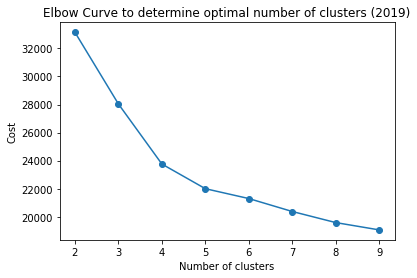

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from kmodes.kprototypes import KPrototypes

CLUSTERS = 3
def generateElbowCurve(year):
    df = pd.read_csv(f'{year}_10000.csv', encoding='UTF-16 LE', sep='\t', header=0)
    # mapping = {'1/': 1, '2/': 2, '3/': 3, '4/': 4, '5/': 5, '6/': 6, '7/': 7, '8/': 8, '9/': 9}
    # df['Arrival Date'] = df['Arrival Date'].apply(lambda x: mapping[x[:2]])
    # rename Arrival Date to Month
    # df.rename(columns={'Arrival Date': 'Arrival Month'}, inplace=True)
    # drop Room Nights
    df.drop(columns=['Room Nights', 'Arrival Date'], inplace=True)


    # find the columns with string values
    string_cols = [col for col in df.columns if df[col].dtype == 'object']
    categorical_features_idx = [df.columns.get_loc(col) for col in string_cols]
    mark_array=df.values

    costs = []
    for CLUSTERS in range(2, 10):
        try:
            kproto = KPrototypes(n_clusters=CLUSTERS, verbose=True, max_iter=20).fit(mark_array, categorical=categorical_features_idx)
            clusters = kproto.predict(mark_array, categorical=categorical_features_idx)
            costs.append(kproto.cost_)
        except:
            print('Cannot cluster with {} clusters'.format(CLUSTERS))


    plt.plot( range(2, 10), costs, marker='o' )
    plt.title(f'Elbow Curve to determine optimal number of clusters ({year})')
    plt.xlabel('Number of clusters')
    plt.ylabel('Cost')
    plt.show()

generateElbowCurve(2019)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 655, ncost: 33777.48739450508
Run: 1, iteration: 2/20, moves: 8, ncost: 33777.01767809226
Run: 1, iteration: 3/20, moves: 0, ncost: 33777.01767809226
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/20, moves: 715, ncost: 41318.17030034091
Run: 2, iteration: 2/20, moves: 528, ncost: 40838.36753923409
Run: 2, iteration: 3/20, moves: 325, ncost: 40779.70168432166
Run: 2, iteration: 4/20, moves: 16, ncost: 40779.10550702334
Run: 2, iteration: 5/20, moves: 0, ncost: 40779.10550702334
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/20, moves: 1398, ncost: 34075.469017191834
Run: 3, iteration: 2/20, moves: 214, ncost: 33859.97506570469
Run: 3, iteration: 3/20, moves: 1, ncost: 33859.96128059792
Run: 3, i

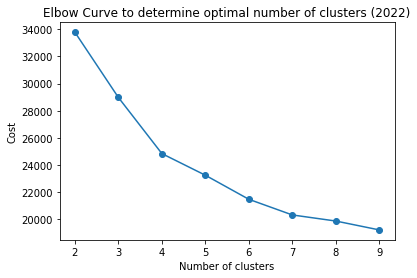

In [ ]:
generateElbowCurve(2022)

In [ ]:
def generateClusters(YEAR):
    for CLUSTERS in (3,4,5):
        df = pd.read_csv(f'{YEAR}_10000.csv', encoding='UTF-16 LE', sep='\t', header=0)

        arrivalMonth = df['Arrival Date']
        # drop Room Nights
        df.drop(columns=['Room Nights', 'Arrival Date'], inplace=True)


        # find the columns with string values
        string_cols = [col for col in df.columns if df[col].dtype == 'object']
        categorical_features_idx = [df.columns.get_loc(col) for col in string_cols]
        mark_array=df.values

        #verbose =2
        kproto = KPrototypes(n_clusters=CLUSTERS, verbose=False, max_iter=20).fit(mark_array, categorical=categorical_features_idx)
        clusters = kproto.predict(mark_array, categorical=categorical_features_idx)
        df['cluster'] = list(clusters)

        # add Arrival Month back to the front
        df.insert(0, 'Arrival Month', arrivalMonth)

        #reorder the dataframe based on the cluster
        df = df.sort_values(by=['cluster'])

        # save the clusters
        df.to_csv(f'clusters{CLUSTERS}_{YEAR}_10000.csv', index=False)
        print('Clusters: ', CLUSTERS)
        print(df['cluster'].value_counts())
        print()
generateClusters(2019) 

generateClusters(2022) 

Clusters:  3
2    7252
1    1657
0    1091
Name: cluster, dtype: int64

Clusters:  4
3    4610
2    3668
0    1573
1     149
Name: cluster, dtype: int64

Clusters:  5
4    3824
3    2506
2    2214
1    1047
0     409
Name: cluster, dtype: int64

Clusters:  3
0    4543
2    4515
1     942
Name: cluster, dtype: int64

Clusters:  4
3    7180
0    1500
2    1064
1     256
Name: cluster, dtype: int64

Clusters:  5
0    3961
4    3557
3    1499
1     727
2     256
Name: cluster, dtype: int64



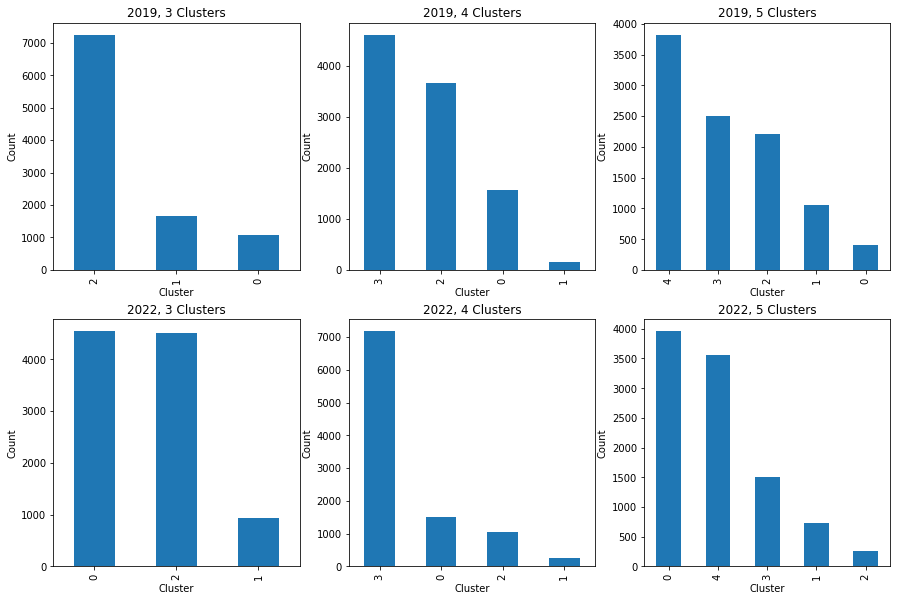

In [29]:
files = ['clusters3_2019.csv', 'clusters4_2019.csv', 'clusters5_2019.csv', 
'clusters3_2022.csv', 'clusters4_2022.csv', 'clusters5_2022.csv']

files = [s.replace('.', '_10000.') for s in files]


def nameAxis(num):
    if num == 0:
        return ['First', 'Second', 'Third']
    elif num == 1:
        return ['First', 'Second', 'Third', 'Fourth']
    elif num == 2:
        return ['First', 'Second', 'Third', 'Fourth', 'Fifth']
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
for i, file in enumerate(files): 
    df = pd.read_csv(file)
    # bar graph with using nameAxis function with i%3 to get the correct axis
    # ax[i//3, i%3].bar(nameAxis(i%3), df['cluster'].value_counts())
    # set the title
    # ax[i//3, i%3].set_title(f'{file[10:14]}, {file[8]} Clusters')
    df['cluster'].value_counts().plot(kind='bar', ax=ax[i//3][i%3], title=f'{file[10:14]}, {file[8]} Clusters')
    ax[i//3][i%3].set_xlabel('Cluster')
    ax[i//3][i%3].set_ylabel('Count')
plt.show()

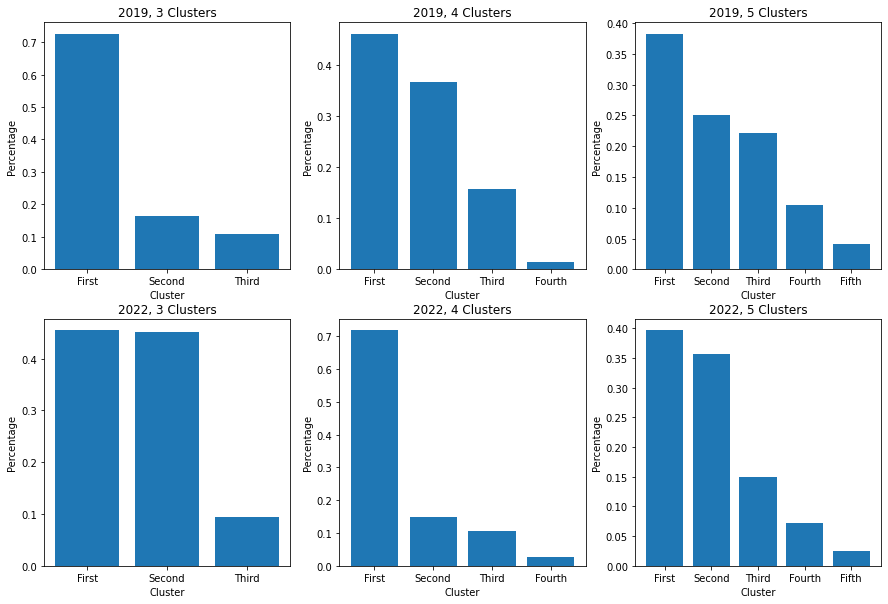

In [17]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
for i, file in enumerate(files):
    df = pd.read_csv(file)
    # bar graph with using nameAxis function with i%3 to get the correct axis
    ax[i//3, i%3].bar(nameAxis(i%3), df['cluster'].value_counts(normalize=True))
    # set the title
    ax[i//3, i%3].set_title(f'{file[10:14]}, {file[8]} Clusters')
    # df['cluster'].value_counts().plot(kind='bar', ax=ax[i//3][i%3], title=f'{file[-8:-4]}Clusters: {file[8]}')
    ax[i//3][i%3].set_xlabel('Cluster')
    ax[i//3][i%3].set_ylabel('Percentage')

plt.show()

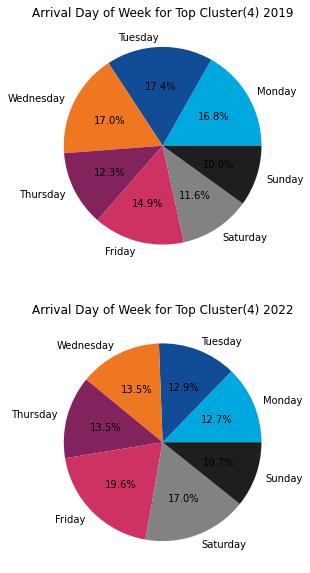

In [5]:
import pandas as pd
from matplotlib import pyplot as plt
import datetime
cluster2019 = pd.read_csv('clusters4_2019_10000.csv')
cluster2022 = pd.read_csv('clusters4_2022_10000.csv')

def getDayOfWeek(date):
    """
    date is in the format of 'Month/Day/Year'
    """
    return datetime.datetime.strptime(date, '%m/%d/%Y').strftime('%A')

for df in (cluster2019, cluster2022):
    df['Arrival Month'] = df.apply(lambda x: getDayOfWeek(x['Arrival Month']), axis=1)
    df.rename(columns={'Arrival Month': 'Arrival Day of Week'}, inplace=True)

cluster2019Index = cluster2019['cluster'].value_counts().index[0]
cluster2022Index = cluster2022['cluster'].value_counts().index[0]

cluster2019[cluster2019['cluster'] == cluster2019Index]['Arrival Day of Week']
cluster2022[cluster2022['cluster'] == cluster2022Index]['Arrival Day of Week']

# for each cluster, make a boxplot for Booking Channel
fig, ax = plt.subplots(2, 1, figsize=(15, 10))

daysOfWeek = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
colors = ['#00A8E0','#114D97','#EF7722','#83235E', '#CE3262', '#828282', '#1E1E1E']
# pie chart for arrival day of week of cluster 0
ax[0].pie(cluster2019[cluster2019['cluster'] == cluster2019Index]['Arrival Day of Week'].value_counts()[daysOfWeek], labels=daysOfWeek, colors=colors, autopct = '%1.1f%%')
ax[0].set_title('Arrival Day of Week for Top Cluster(4) 2019')
# pie chart for arrival day of week of cluster 1 and use same color scheme as cluster 0
ax[1].pie(cluster2022[cluster2022['cluster'] == cluster2022Index]['Arrival Day of Week'].value_counts()[daysOfWeek], labels=daysOfWeek, colors=colors, autopct = '%1.1f%%')
ax[1].set_title('Arrival Day of Week for Top Cluster(4) 2022')

plt.show()

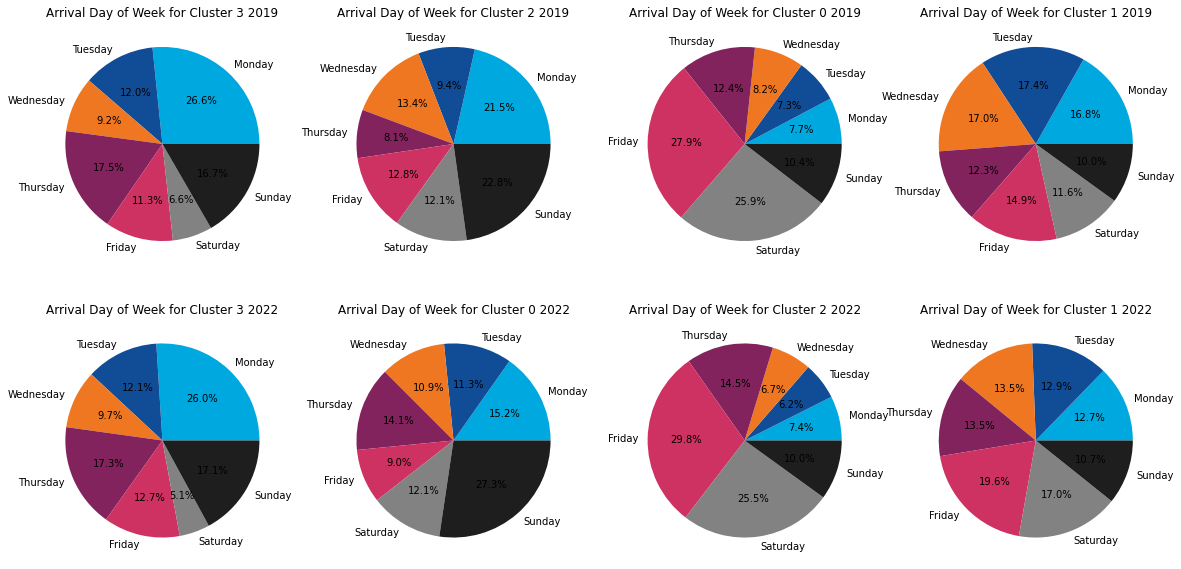

In [7]:

fig, ax = plt.subplots(2, 4, figsize=(20, 10))
#plot a pie chart for each cluster in 2019 in the first row
# plot a pie chart for each cluster in 2022 in the second row
for i in range(4):
    ax[0, i].pie(cluster2019[cluster2019['cluster'] == i]['Arrival Day of Week'].value_counts()[daysOfWeek], labels=daysOfWeek, colors=colors, autopct = '%1.1f%%')
    ax[0, i].set_title(f'Arrival Day of Week for Cluster {[3,2,0,1][i]} 2019')
    ax[1, i].pie(cluster2022[cluster2022['cluster'] == i]['Arrival Day of Week'].value_counts()[daysOfWeek], labels=daysOfWeek, colors=colors, autopct = '%1.1f%%')
    ax[1, i].set_title(f'Arrival Day of Week for Cluster {[3,0,2,1][i]} 2022')

plt.show()

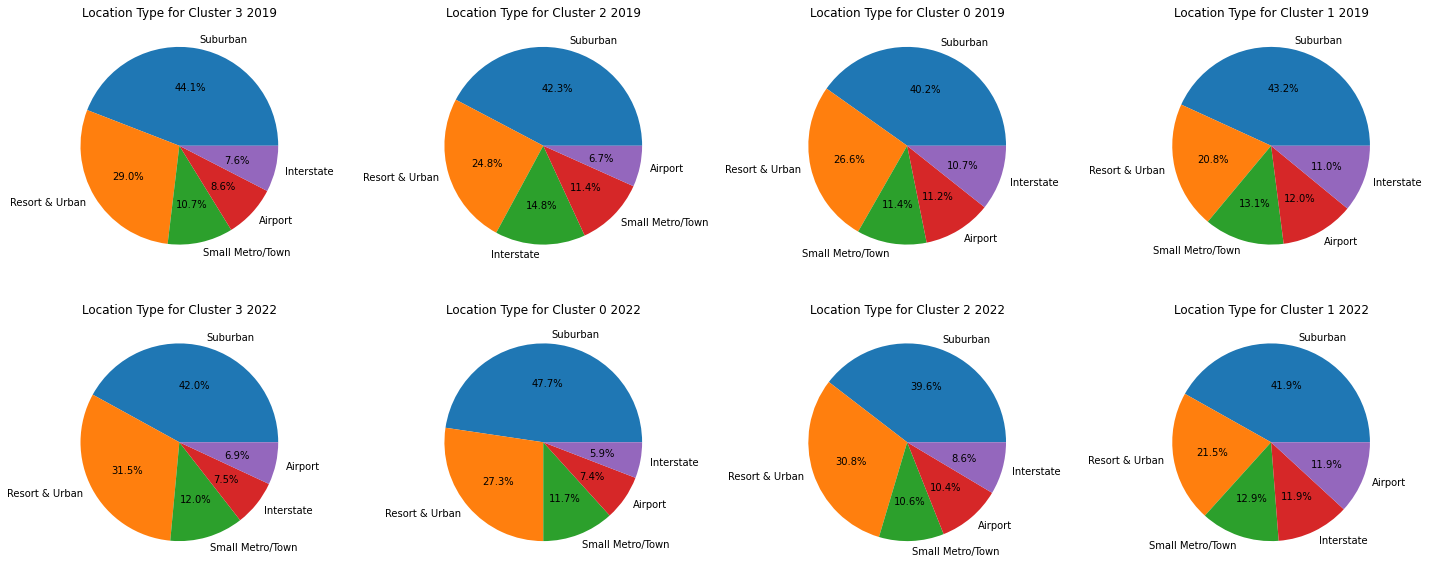

In [10]:
fig, ax = plt.subplots(2, 4, figsize=(25, 10))

# combine 'Resort' and 'Urban' into 'Resort & Urban'
cluster2019['Location Type'] = cluster2019['Location Type'].apply(lambda x: 'Resort & Urban' if x == 'Resort' or x == 'Urban' else x)
cluster2022['Location Type'] = cluster2022['Location Type'].apply(lambda x: 'Resort & Urban' if x == 'Resort' or x == 'Urban' else x)

for i in range(4):
    ax[0, i].pie(cluster2019[cluster2019['cluster'] == i]['Location Type'].value_counts(), labels=cluster2019[cluster2019['cluster'] == i]['Location Type'].value_counts().index, autopct = '%1.1f%%')
    ax[0, i].set_title(f'Location Type for Cluster {[3,2,0,1][i]} 2019')
    ax[1, i].pie(cluster2022[cluster2022['cluster'] == i]['Location Type'].value_counts(), labels=cluster2022[cluster2022['cluster'] == i]['Location Type'].value_counts().index, autopct = '%1.1f%%')
    ax[1, i].set_title(f'Location Type for Cluster {[3,0,2,1][i]} 2022')

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from kmodes.kprototypes import KPrototypes

YEAR = 2019
for CLUSTERS in (4,):
    df = pd.read_csv(f'{YEAR}_10000.csv', encoding='UTF-16 LE', sep='\t', header=0)

    arrivalMonth = df['Arrival Date']
    # drop Room Nights
    df.drop(columns=['Room Nights', 'Arrival Date'], inplace=True)


    # find the columns with string values
    string_cols = [col for col in df.columns if df[col].dtype == 'object']
    categorical_features_idx = [df.columns.get_loc(col) for col in string_cols]
    mark_array=df.values

    #verbose =2
    kproto = KPrototypes(n_clusters=CLUSTERS, verbose=False, max_iter=20).fit(mark_array, categorical=categorical_features_idx)
    clusters = kproto.predict(mark_array, categorical=categorical_features_idx)
    df['cluster'] = list(clusters)

    # add Arrival Month back to the front
    df.insert(0, 'Arrival Month', arrivalMonth)

    #reorder the dataframe based on the cluster
    df = df.sort_values(by=['cluster'])

    # save the clusters
    df.to_csv(f'clusters{CLUSTERS}_{YEAR}_10000.csv', index=False)
    print('Clusters: ', CLUSTERS)
    print(df['cluster'].value_counts())
    print()

Clusters:  4
1    7252
3    1519
2    1080
0     149
Name: cluster, dtype: int64



In [31]:
# kproto.num_dissim(df['Booking Channel'].to_numpy(), df['Honors Tier'].to_numpy())
# df['Booking Channel'].to_numpy() )
kproto.n_clusters

4